In [1]:
%matplotlib inline

import time
import pylab

from IPython import display
from ipywidgets import  interact
import ipywidgets as widgets

In [2]:
from poppy.creatures import PoppyErgoJr

jr = PoppyErgoJr()

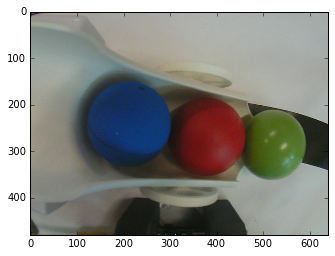

In [3]:
import cv2

pylab.imshow(cv2.cvtColor(jr.camera.frame, cv2.COLOR_RGB2BGR))

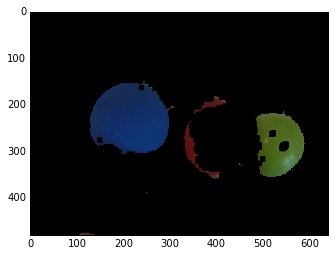

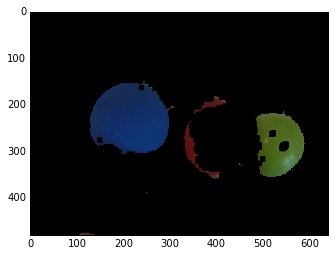

In [4]:
def mask(rmin, rmax, 
        gmin, gmax, 
        bmin, bmax,
        hmin, hmax,
        smin, smax,
        vmin, vmax):   

    img = jr.camera.frame.copy()
    hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

    rgb_mask = cv2.inRange(img, (bmin, gmin, rmin), (bmax, gmax, rmax))
    hsv_mask = cv2.inRange(hsv, (hmin, smin, vmin), (hmax, smax, vmax))
    
    mask = rgb_mask.copy()
    
    mask[hsv_mask < 255] = 0

    mask = cv2.dilate(mask, None, iterations=2)
    mask = cv2.erode(mask, None, iterations=5)

    img[mask < 255] = (0, 0, 0)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    pylab.imshow(img, cmap='gray', clim=(0, 255))
    display.clear_output(wait=True)
    display.display(pylab.gcf())

interact(mask, 
        rmin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        rmax=widgets.IntSlider(min=0,max=255,step=5,value=255),
        gmin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        gmax=widgets.IntSlider(min=0,max=255,step=5,value=255),
        bmin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        bmax=widgets.IntSlider(min=0,max=255,step=5,value=255),
       
        hmin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        hmax=widgets.IntSlider(min=0,max=255,step=5,value=255),
        smin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        smax=widgets.IntSlider(min=0,max=255,step=5,value=255),
        vmin=widgets.IntSlider(min=0,max=255,step=5,value=0), 
        vmax=widgets.IntSlider(min=0,max=255,step=5,value=255),
       )